# Linear regression in Python with Scikit-learn
Click the image below to read the post online.

<a href='https://www.machinelearningnuggets.com/python-linear-regression/'><img src='https://drive.google.com/uc?export=view&id=1kOh9VYVxg0n3ALZPCEW3kiYCVL-PhyRI'>

Scikit-learn is a handy and robust library with efficient tools for machine learning that provides a variety of supervised and unsupervised machine learning algorithms. The library is written in Python and is built on Numpy, Pandas, Matplotlib, and Scipy.

Linear regression is a type of predictive analysis that attempts to predict the value of a variable(dependent variable) with another variable(independent variable)

# Installing Scikit-learn

* Using Anaconda: `conda install -c conda-forge scikit-learn`

* Using pip: `pip install -U scikit-learn`

In [ ]:
# import all the libraries and modules we will need

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Scikit-learn modelling process

* Loading datasets.
* Splitting the dataset.
* Training the Model.

## Loading Scikit-learn built-in example datasets

In [ ]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
X = housing_data.data # represent the feature matrix
y = housing_data.target # represent the response vector/target

feature_names = housing_data.feature_names
target_names = housing_data.target_names

print('Feature names: ', feature_names)
print('\nTarget names: ', target_names, '(Median house value for households within a block)') 
print("\nFirst 5 rows of X:\n", X[:5])
print('\nShape of dataset', X.shape)

Feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target names:  ['MedHouseVal'] (Median house value for households within a block)

First 5 rows of X:
 [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]

Shape of dataset (20640, 8)


* Feature names give a list of all the names of the features in the feature matrix(collection of features)
* Target names represent the possible values from a response column.

## Splitting data

Scikit-learn provides a [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) function for splitting the datasets into train and test subsets.
We will split the California housing dataset in the ratio of 70:30, where 70% will be the training set and 30% for the testing set.

In [ ]:
# We imported the train_test_split() function above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(14448, 8)
(6192, 8)
(14448,)
(6192,)


## Training model and make predictions
Train a prediction model we use the LinearRegression class

In [ ]:
# we imported the LinearRegression class above

regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

# expose the model to new values and predict the target vector
y_predictions = regressor.predict(X_test)
print('Predictions:', y_predictions)
# get the coefficients and intercept
print("Coefficients:\n", regressor.coef_)
print('Intercept:\n', regressor.intercept_)

Predictions: [2.12598355 0.94104495 2.71042934 ... 1.85617769 1.54295782 1.51367783]
Coefficients:
 [ 4.41037995e-01  9.68801816e-03 -1.04781309e-01  6.22052706e-01
 -5.61452681e-06 -3.28792384e-03 -4.23182318e-01 -4.37898856e-01]
Intercept:
 -37.28532899875155


# Simple linear regression

Simple linear regression uses only one independent variable to predict a dependent variable.

User [student_scores dataset](https://www.kaggle.com/datasets/himanshunakrani/student-study-hours) from [Kaggle](https://www.kaggle.com/)for simple linear regression.

### Loading dataset

In [ ]:
# LOADING DATASET
stud_scores = pd.read_csv('student_scores.csv')
stud_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
stud_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
stud_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Generating a heatmap of correlations

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


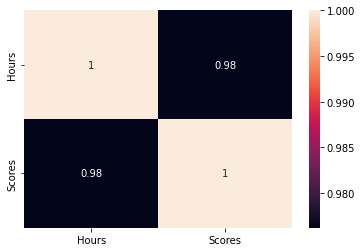

In [ ]:
# Correlations
print(stud_scores.corr())
sns.heatmap(stud_scores.corr(), annot=True)

### Feature matrix and Response Vector

In [ ]:
# CREATING FEATURE MATRIX AND RESPONSE VECTOR
X = stud_scores.iloc[:,:-1].values # feature matrix
y = stud_scores.iloc[:,1].values # response vector

### Splitting data into train and test data and fitting the model with LinearRegression class

In [ ]:
# SPLITTING THE DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# FITTING LINEAR REGRESSION MODEL / TRAINING
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# GETTING THE COEFFICIENTS AND INTERCEPT
print('Coefficients: ', regressor.coef_)
print('Intercept: ',regressor.intercept_)

Coefficients:  [10.41075981]
Intercept:  -1.5123061161277889


### Making predictions

In [ ]:
# PREDICTION OF TEST RESULT
y_pred = regressor.predict(X_test)
print('Predictions:\n', y_pred)

# COMPARING TEST DATA AND PREDICTED DATA
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

Predictions:
 [ 9.93952968 32.84320126 18.26813752 86.97915227 48.45934097 78.65054442
 61.99332873 75.52731648]


,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


### Evaluating the performance of the model with Regression metrics

In [ ]:
# EVALUATING MODEL METRICS
print('MAE:', mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print('Model Score: ', r2)

MAE: 7.169048271425507
MSE 56.092330905646705
RMSE 7.489481350911204
Model Score:  0.8933827573294114


### Drawing a regression fit line for the model

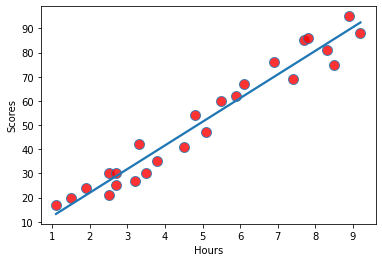

In [ ]:
# FITTING LINEAR REGRESSION LINE
sns.regplot(x='Hours', y='Scores', data=stud_scores, ci=None, 
            scatter_kws={'s':100, 'facecolor':'red'})

# Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression with multiple independent variables to predict a dependent variable.

Load the [50 startups dataset](https://www.kaggle.com/datasets/farhanmd29/50-startups) from [Kaggle](https://www.kaggle.com). The dataset is a .csv file with data collected from New York, California, and Florida about 50 business Startups, "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending. Our main goal is to predict the profits.

In [ ]:
# LOAD DATASET
startups_df = pd.read_csv('50_Startups.csv')
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startups_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
startups_df.shape

(50, 5)

### Checking the correlation of the cdata and plotting a heatmap for the correlation

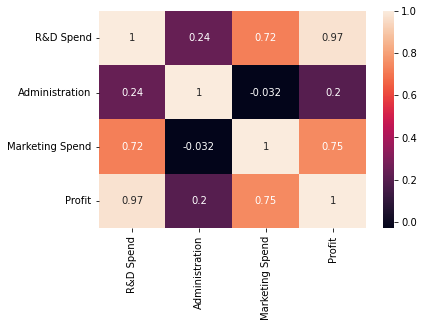

In [ ]:
startups_df.corr()
sns.heatmap(startups_df.corr(), annot=True)

### Feature matrix and response vector

In [ ]:
# SPLITTING THE DATA INTO INDEPEDENT AND DEPENDENT VARIABLES(X, y)
X = startups_df.iloc[:, :-1]    # Independent varibles
y = startups_df.iloc[:, -1]     # dependent variable

### Creating [Dummy variables and Avoiding dummy variable trap](https://www.machinelearningnuggets.com/python-linear-regression/#dummy-variables-and-dummy-variable-trap)

In [ ]:
# USING OneHotEncoder TO CONVERT CATEGORICAL DATA TO DUMMY VARIABLES

# creating instance of one-hot-encoder
enc = OneHotEncoder(drop='first') # drop the first dummy variable (K-1)
enc_df = pd.DataFrame(enc.fit_transform(X[['State']]).toarray())
enc_df.columns = ['Florida', 'New York']
# merge with main df on key values
X = X.join(enc_df)
X = X.drop('State', axis=1) # DROP THE State COLUMN
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0


* Splitting the data into train and test datasets.
* Fitting the model with LinearRegression

In [ ]:
# SPLITTING DATA FOR train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# FITTING THE MODEL/TRAIN
regressor = LinearRegression() # Instatiate LinearREgression object
regressor.fit(X_train, y_train) # fit the model

LinearRegression()

In [ ]:
print('Coefficients: ', regressor.coef_)
print('Intercept: ',regressor.intercept_)

Coefficients:  [ 7.73467193e-01  3.28845975e-02  3.66100259e-02 -9.59284160e+02
  6.99369053e+02]
Intercept:  42554.16761773238


### Making predictions

In [ ]:
# PREDICTING
y_pred=regressor.predict(X_test)
# predictions
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(comparison_df)

       Actual      Predicted
28  103282.38  103015.201598
11  144259.40  132582.277608
10  146121.95  132447.738452
41   77798.83   71976.098513
2   191050.39  178537.482211
27  105008.31  116161.242302
38   81229.06   67851.692097
31   97483.56   98791.733747
22  110352.25  113969.435330
4   166187.94  167921.065696


### Checking the residuals

In [ ]:
# RESIDUALS
residuals = y_test - y_pred
print('Residuals: ', residuals)

# CHECKING THE SCORE OF THE MODEL WITH R^2 METRIC
score = r2_score(y_test, y_pred)
print('Model Score: ', score, 'Equal to: ', score * 100, '%')

Residuals:  28      267.178402
11    11677.122392
10    13674.211548
41     5822.731487
2     12512.907789
27   -11152.932302
38    13377.367903
31    -1308.173747
22    -3617.185330
4     -1733.125696
Name: Profit, dtype: float64
Model Score:  0.9347068473282423 Equal to:  93.47068473282422 %


## Where to go from here

Follow us on [LinkedIn](https://www.linkedin.com/company/mlnuggets), [Twitter](https://twitter.com/ml_nuggets), [GitHub](https://github.com/mlnuggets) and subscribe to our [blog](https://www.machinelearningnuggets.com/) so that you don't miss a new issue.